# You Only Look Once:
# Unified, Real-Time Object Detection
Joseph Redmon
, Santosh Divvala, Ross Girshick
, Ali Farhadi

University of Washington
, Allen Institute for AI
, Facebook AI Research

## Unfied Detection
---
### Confidence Score란?
- Yolo는 예측된 각각의 바운딩 박스들에 대해 신뢰도 점수를 계산하는데, 이 점수는 바운딩 박스가 객체를 포함할 확률과 이 객체가 특정 클래스일 확률을 결합한 것입니다.

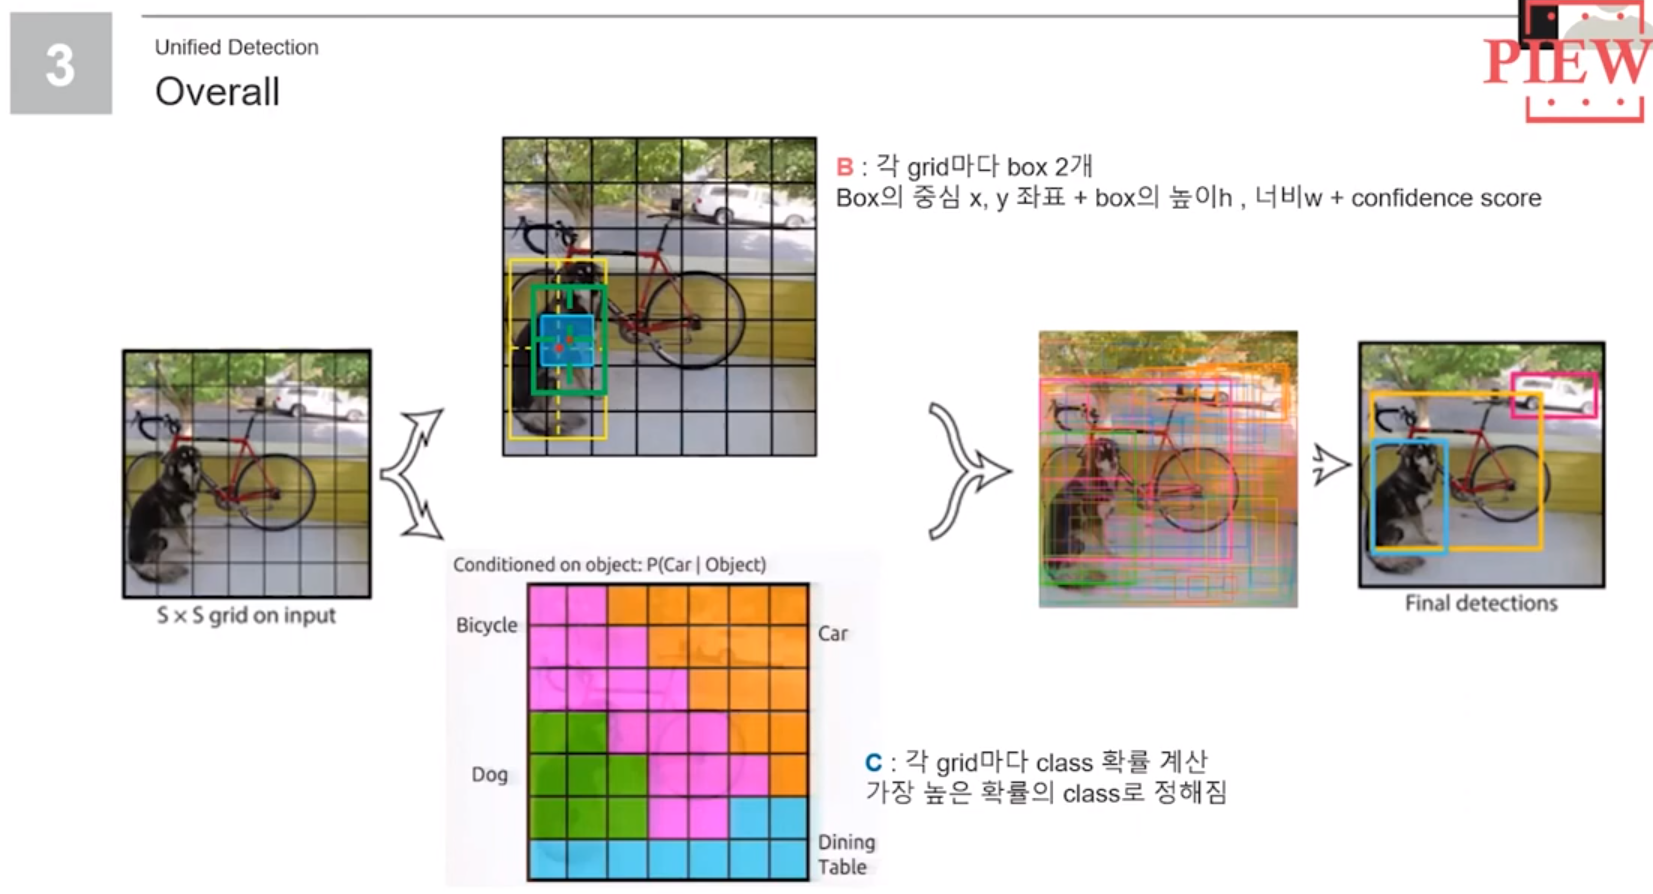
- 위의 그림에서 알 수 있듯이 각각의 바운딩 박스는 Output으로 (x,y,h,w, onfidence score) 값을 갖습니다.

### Loss Function에 대해서
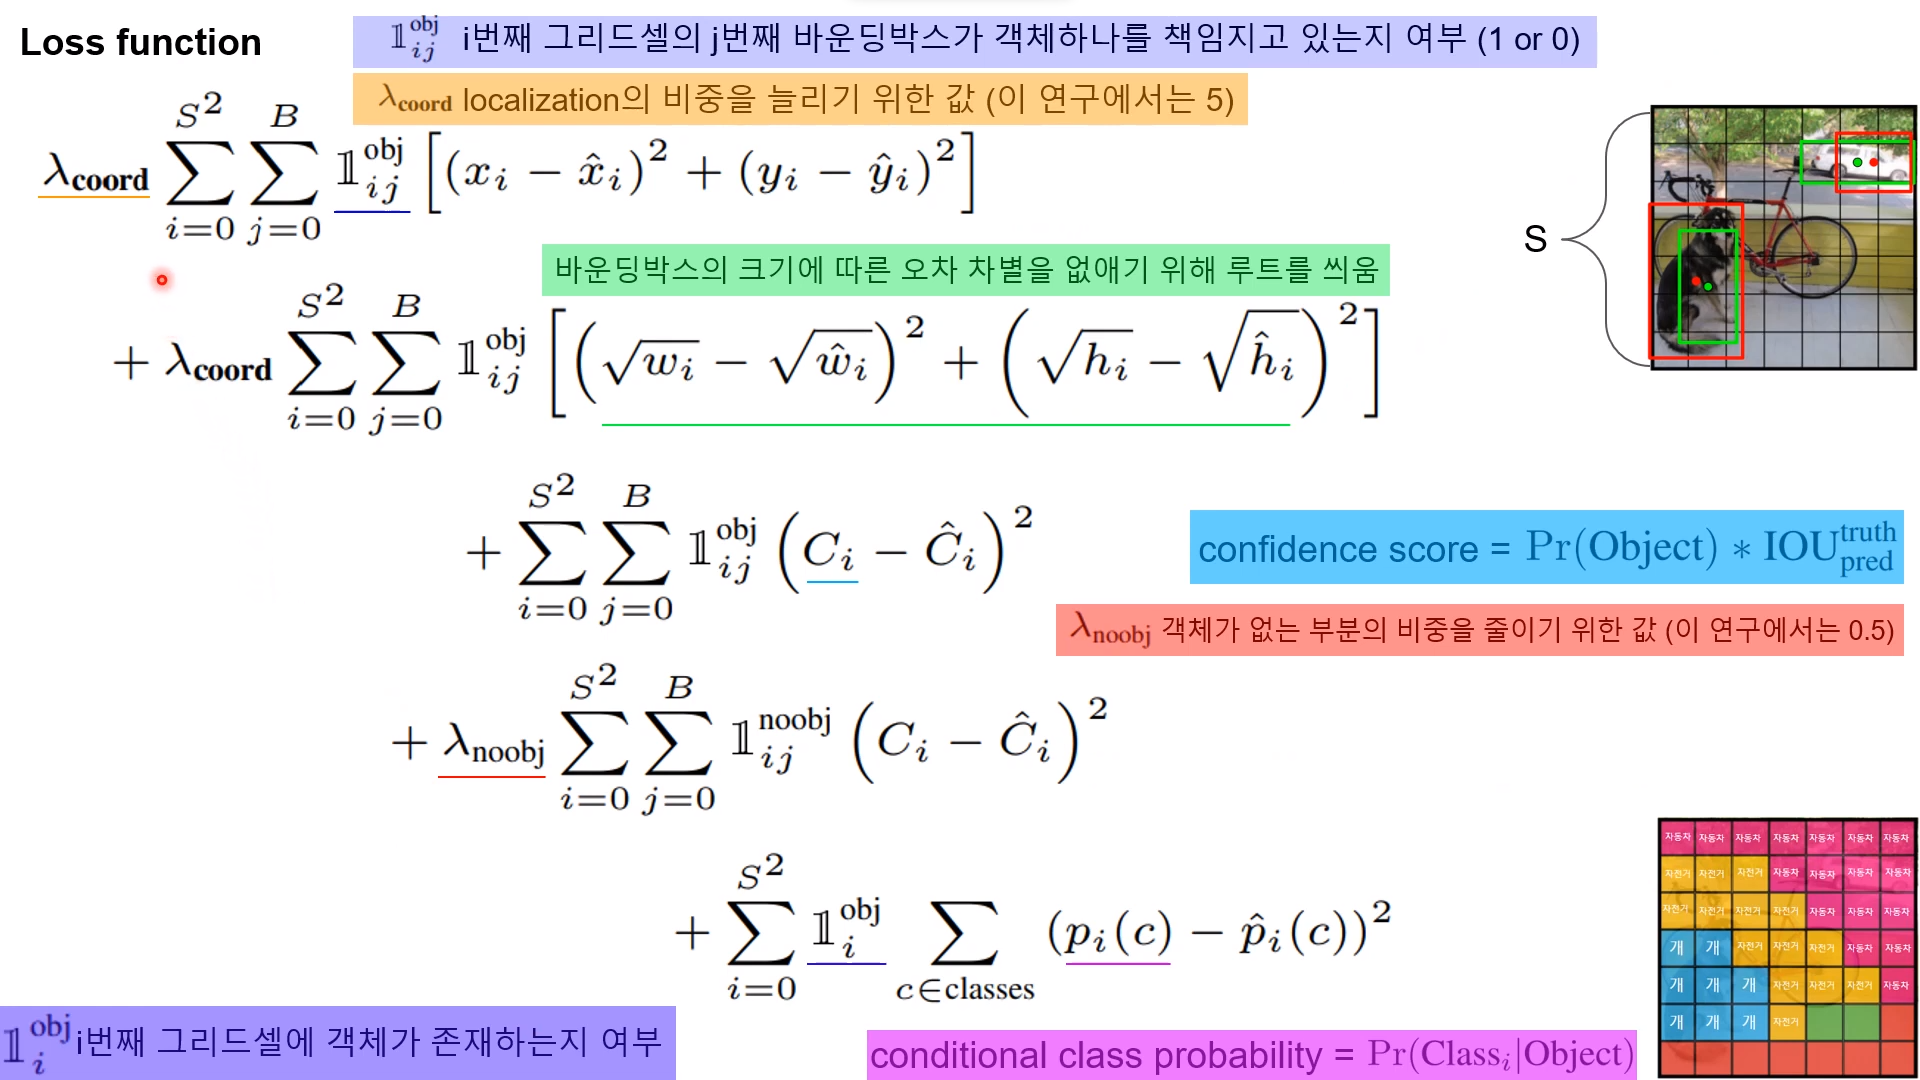

- Yolo의 손실함수는 각 그리드의 두 개의 바운딩 박스에 대해서 object를 책임지는지 여부를 따지고, 이를 통해 비중(Lambda)을 다르게 줌으로써 학습을 진행합니다.

### NMS(Non Maximun Suppression - 비최댓값 억제)

- 확률이 가장 높은 상자와 겹치는 상자들을 제거하는 과정으로 Confidence Score가 높은 순으로 정렬을 한 뒤 같은 객체를 탐지하는 바운딩 박스간의 IOU비교를 통해 최댓값을 갖지 않는 상자들을 제거합니다.
  1. 확률 기준으로 모든 상자를 정렬하고 먼저 가장 확률이 높은 상자를 취함
  2. 각 상자에 대해 다른 모든 상자와의 IOU를 계산
  3. 특정 임곗값을 넘는 상자는 제거
  
  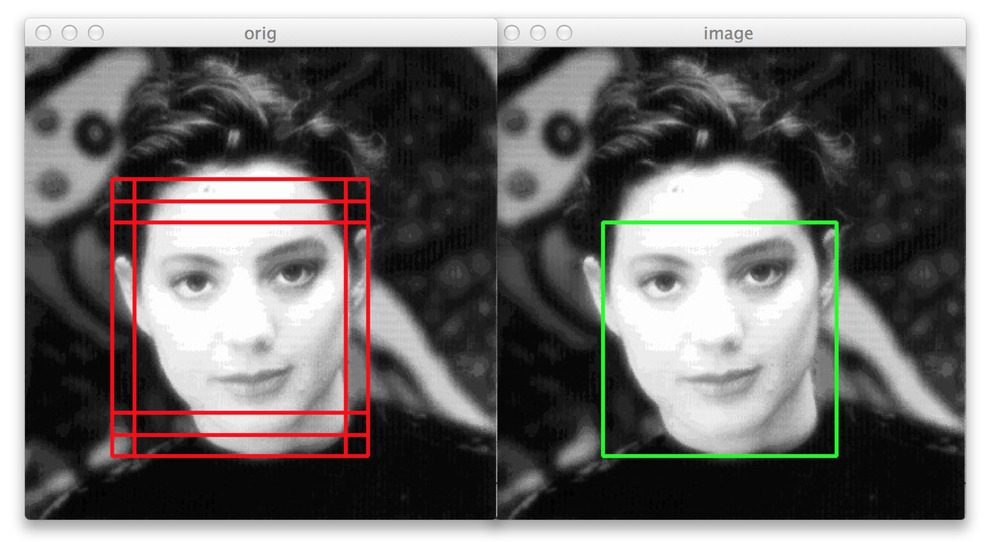

### Yolo는 어떻게 Grid를 분할하나요?
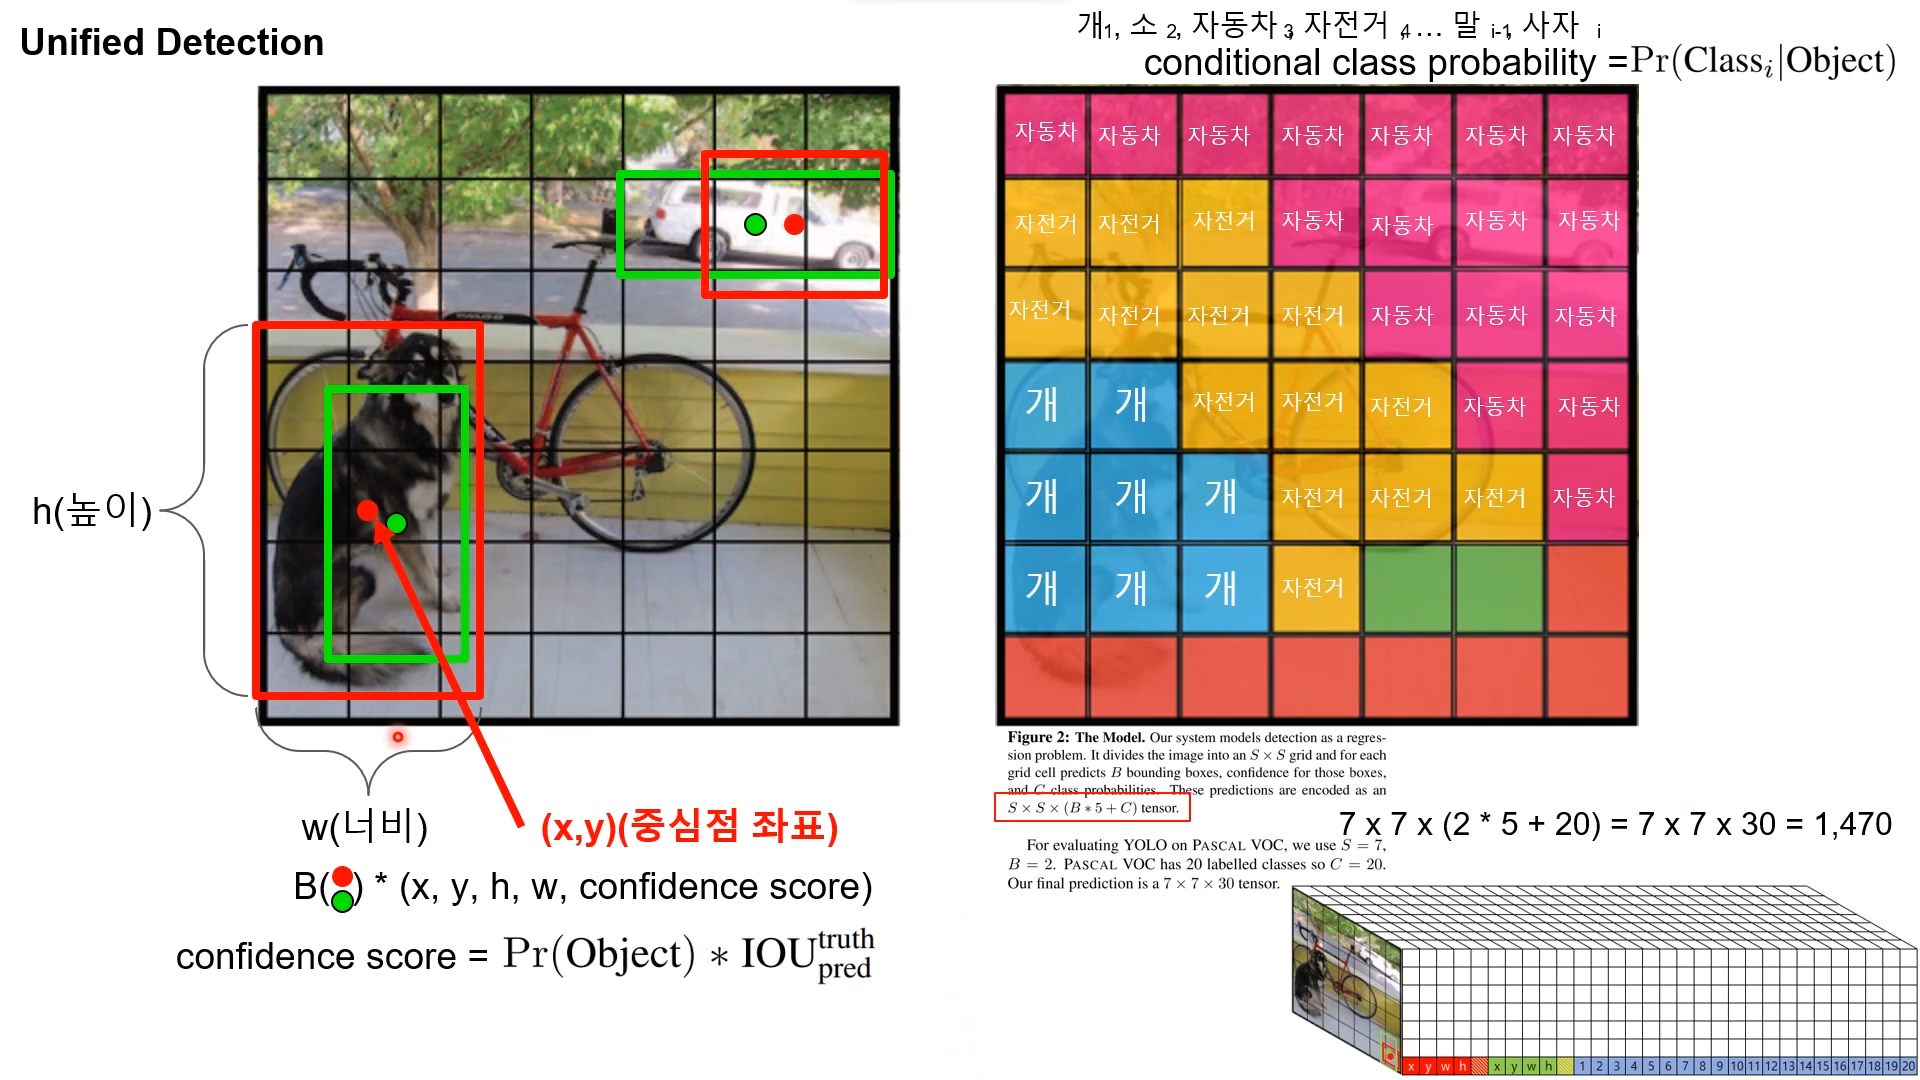
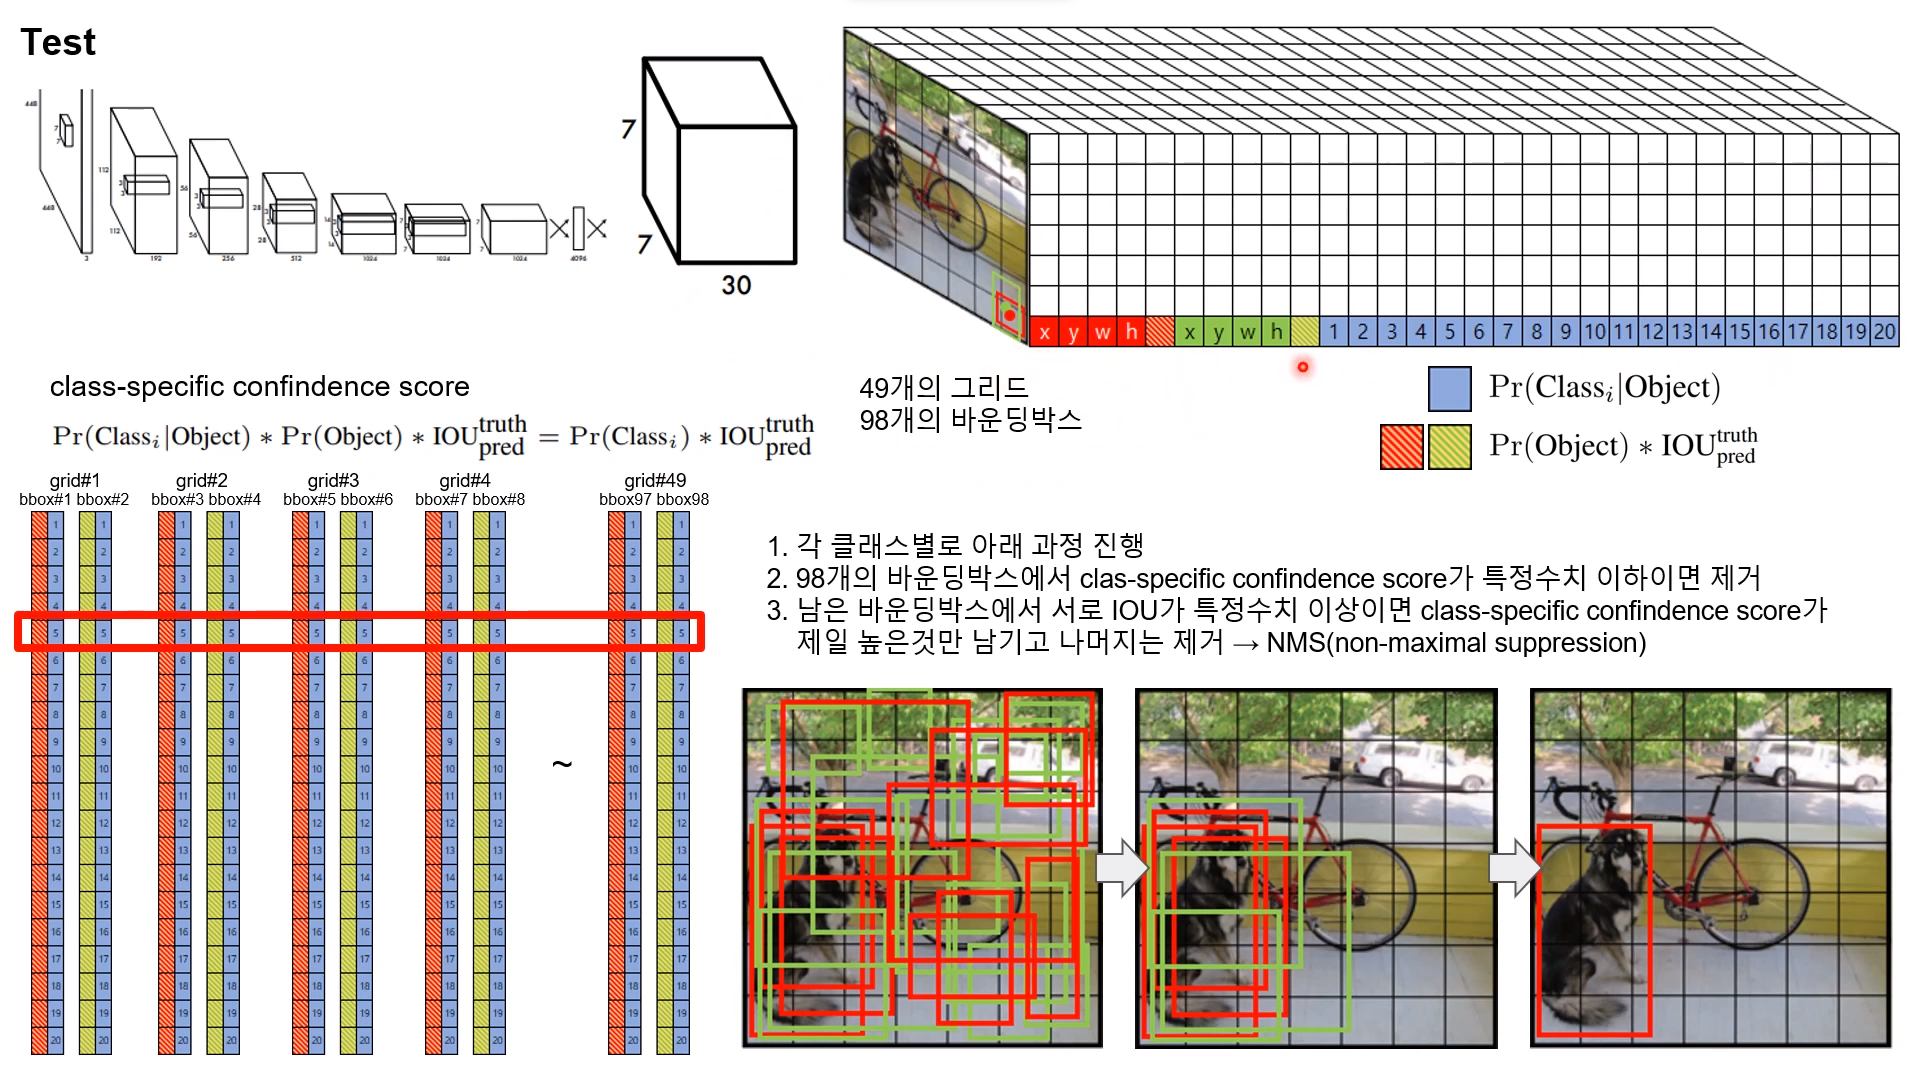

- 욜로는 전체 이미지를 $S*S$의 Grid로 나누는데 논문에서는 $7*7$의 크기로 이미지를 나누었습니다. 총 49개의 Grid를 생성하고, 각각의 Grid 마다 두 개의 BBox를 그리므로 총 98개의 BBox를 갖게 됩니다.


- 그리고 이를 위에서 언급했던 NMS을 통해 가장 적합한 BBox만을 남기고 제거합니다.


- 마지막 아웃풋 레이어를 통해 이를 확인 할 수 있는데, $7*7$ 크기에 $(2*5 + 20)$의 Feature값을 갖는 것을 알 수 있습니다.

## Object Detection의 Metric(평가지표)
---

### 정밀도(Precision)와 재현율(Recall)

- 일반적으로 객체 탐지 모델 평가에 사용되지는 않지만, 다른 지표를 계산하는 기본 지표 역할을 합니다.

  - True Positives(`TP`): 예측이 동일 클래스의 실제 상자와 일치하는지 측정
  - False Positives(`FP`): 예측이 실제 상자와 일치하지 않는지 측정
  - False Negatives(`FN`): 실제 분류값이 그와 일치하는 예측을 갖지 못하는지 측정

  $\qquad precision = \frac{TP}{TP \ + \ FP}$
  $\qquad recall = \frac{TP}{TP \ + \ FN}$


- 모델이 안정적이지 않은 특징을 기반으로 객체 존재를 예측하면 거짓긍정(FP)이 많아져서 정밀도가 낮아지게 됩니다.
  
  (예시 : 100명의 환자 중 폐렴 환자가 50명 일때, 의사가 100명 모두 폐렴이라고 진단한 경우 Recall = 1, Precision = 0.5)
  

- 모델이 너무 엄격해서 정확한 조건을 만족할 때만 객체가 탐지된 것으로 간주하면 거짓부정(FN)이 많아져서 재현율이 낮아집니다.
  
  (예시 : 100명의 환자 중 폐렴 환자가 50명 일때, 의시가 정말 누가 봐도 심각해 보이는 5명만 폐렴이라고 진단한 경우 Recall = 0.1, Precision = 1)
  
  



### 그리고 이를 기반으로 한 평가 지표인 AP와 mAP가 있습니다.
- **AP**는 Average Precision으로 클래스에 대한 정밀도의 평균을 말합니다. 
    - 즉 강아지를 강아지라고 말할 확률을 얘기합니다. 
    
    
- **mAP**의 경우 각 클래스의 AP에 대한 mean값을 얘기합니다.
    - (강아지를 강아지라고 말할 확률 + 고양이를 고양이라고 말할 확률 +...+)/num_of_classes 로 계산할 수 있습니다.


### 정밀도-재현율 곡선(Precision-Recall Curve)

- 신뢰도 임계값마다 모델의 정밀도와 재현율을 시각화
- 모든 bounding box와 함께 모델이 예측의 정확성을 얼마나 확실하는지 0 ~ 1사이의 숫자로 나타내는 신뢰도를 출력
- 임계값 T에 따라 정밀도와 재현율이 달라짐
  - 임계값 T 이하의 예측은 제거함
  - T가 1에 가까우면 정밀도는 높지만 재현율은 낮음  
  - 놓치는 객체가 많아져서 재현율이 낮아짐. 즉, 신뢰도가 높은 예측만 유지하기때문에 정밀도는 높아짐
  - T가 0에 가까우면 정밀도는 낮지만 재현율은 높음  
  - 대부분의 예측을 유지하기때문에 재현율은 높아지고, 거짓긍정(FP)이 많아져서 정밀도가 낮아짐
- 예를 들어, 모델이 보행자를 탐지하고 있으면 특별한 이유없이 차를 세우더라도 어떤 보행자도 놓치지 않도록 재현율을 높여야 함
- 모델이 투자 기회를 탐지하고 있다면 일부 기회를 놓치게 되더라도 잘못된 기회에 돈을 거는 일을 피하기 위해 정밀도를 높여야 함

<img src="https://www.researchgate.net/profile/Davide_Chicco/publication/321672019/figure/fig1/AS:614279602511886@1523467078452/a-Example-of-Precision-Recall-curve-with-the-precision-score-on-the-y-axis-and-the.png">

### AP (Average Precision, 평균 정밀도) 와 mAP(mean Average Precision)

- 곡선의 아래 영역에 해당
- 항상 1x1 정사각형으로 구성되어 있음  
  즉, 항상 0 ~ 1 사이의 값을 가짐
- 단일 클래스에 대한 모델 성능 정보를 제공
- 전역 점수를 얻기위해서 mAP를 사용
- 예를 들어, 데이터셋이 10개의 클래스로 구성된다면 각 클래스에 대한 AP를 계산하고, 그 숫자들의 평균을 다시 구함

- mAP 사용
  - 최소 2개 이상의 객체를 탐지하는 대회인 PASCAL Visual Object Classes와 Common Objects in Context(COCO)에서 mAP가 사용됨
  - COCO 데이터셋이 더 많은 클래스(80)를 포함하고 있기 때문에 보통 Pascal VOC(20)보다 점수가 더 낮게 나옴

    <img src="https://www.researchgate.net/profile/Bong_Nam_Kang/publication/328939155/figure/tbl2/AS:692891936649218@1542209719916/Evaluation-on-PASCAL-VOC-2007-and-MS-COCO-test-dev.png">


### IOU(Intersection Over Union)

- 실측값(Ground Truth)과 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width="300">

- IOU가 높을수록 잘 예측한 모델

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_examples.png" width="400">